In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('compressed_data.csv')

In [3]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,2005.0,620.0,124.0,3.0,0.0,2012-07-11,0.00,5.0,1.0,352.0
3,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0
4,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013.0,577.0,115.0,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0


In [4]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365'],
      dtype='object')

In [5]:
# checking missing values
df.isnull().sum()

id                                  0
NAME                                0
host id                             0
host_identity_verified            276
host name                           0
neighbourhood group                26
neighbourhood                      16
lat                                 8
long                                8
country                           526
country code                      122
instant_bookable                   96
cancellation_policy                70
room type                           0
Construction year                 200
price                             239
service fee                       268
minimum nights                    394
number of reviews                 182
last review                         0
reviews per month                   0
review rate number                307
calculated host listings count    318
availability 365                  420
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101410 entries, 0 to 101409
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              101410 non-null  int64  
 1   NAME                            101410 non-null  object 
 2   host id                         101410 non-null  int64  
 3   host_identity_verified          101134 non-null  object 
 4   host name                       101410 non-null  object 
 5   neighbourhood group             101384 non-null  object 
 6   neighbourhood                   101394 non-null  object 
 7   lat                             101402 non-null  float64
 8   long                            101402 non-null  float64
 9   country                         100884 non-null  object 
 10  country code                    101288 non-null  object 
 11  instant_bookable                101314 non-null  object 
 12  cancellation_pol

In [7]:
# handling missing values
df['last review'] = pd.to_datetime(df['last review'], errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101410 entries, 0 to 101409
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              101410 non-null  int64         
 1   NAME                            101410 non-null  object        
 2   host id                         101410 non-null  int64         
 3   host_identity_verified          101134 non-null  object        
 4   host name                       101410 non-null  object        
 5   neighbourhood group             101384 non-null  object        
 6   neighbourhood                   101394 non-null  object        
 7   lat                             101402 non-null  float64       
 8   long                            101402 non-null  float64       
 9   country                         100884 non-null  object        
 10  country code                    101288 non-null  object 

In [8]:
# filling missing values
df.fillna({'reviews per month' : 0, 'last review': df['last review'].min()}, inplace = True)

In [9]:
# deleting unnecessary columns
df.dropna(subset = ['NAME', 'host name'], inplace = True)

In [10]:
df.isnull().sum()

id                                  0
NAME                                0
host id                             0
host_identity_verified            276
host name                           0
neighbourhood group                26
neighbourhood                      16
lat                                 8
long                                8
country                           526
country code                      122
instant_bookable                   96
cancellation_policy                70
room type                           0
Construction year                 200
price                             239
service fee                       268
minimum nights                    394
number of reviews                 182
last review                         0
reviews per month                   0
review rate number                307
calculated host listings count    318
availability 365                  420
dtype: int64

In [11]:
df = df.drop(columns = ['license', 'house_rules'], errors = 'ignore')
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,2005.0,620.0,124.0,3.0,0.0,2012-07-11,0.00,5.0,1.0,352.0
3,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0
4,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013.0,577.0,115.0,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0


In [12]:
# remove doller sign and convert to float
df['price'] = df['price'].replace('[\$,]','', regex = True).astype(float)
df['service fee'] = df['service fee'].replace('[\$,]', '', regex = True).astype(float)
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\deshwar\AppData\Local\Temp\ipykernel_17912\100582969.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$,]','', regex = True).astype(float)
C:\Users\deshwar\AppData\Local\Temp\ipykernel_17912\100582969.py:3: SyntaxWarning: invalid escape sequence '\$'
  df['service fee'] = df['service fee'].replace('[\$,]', '', regex = True).astype(float)


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,2005.0,620.0,124.0,3.0,0.0,2012-07-11,0.00,5.0,1.0,352.0
3,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0
4,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013.0,577.0,115.0,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0


In [13]:
# remove duplicates
df.drop_duplicates(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101410 entries, 0 to 101409
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              101410 non-null  int64         
 1   NAME                            101410 non-null  object        
 2   host id                         101410 non-null  int64         
 3   host_identity_verified          101134 non-null  object        
 4   host name                       101410 non-null  object        
 5   neighbourhood group             101384 non-null  object        
 6   neighbourhood                   101394 non-null  object        
 7   lat                             101402 non-null  float64       
 8   long                            101402 non-null  float64       
 9   country                         100884 non-null  object        
 10  country code                    101288 non-null  object 

In [14]:
df.describe()

,id,host id,lat,long,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,1.014100e+05,1.014100e+05,101402.000000,101402.000000,101210.000000,101171.000000,101142.000000,101016.000000,101228.000000,101410,101410.000000,101103.000000,101092.000000,100990.000000
mean,2.920959e+07,4.926155e+10,40.728082,-73.949663,2012.486908,625.381008,125.043998,8.113744,27.511854,2018-05-15 21:26:08.721033728,1.163207,3.278558,7.948463,141.164660
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,50.000000,10.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.000000,1.000000,1.000000,-10.000000
25%,1.507574e+07,2.459183e+10,40.688730,-73.982570,2007.000000,340.000000,68.000000,2.000000,1.000000,2017-07-30 00:00:00,0.090000,2.000000,1.000000,3.000000
50%,2.922911e+07,4.912069e+10,40.722300,-73.954440,2012.000000,625.000000,125.000000,3.000000,7.000000,2019-05-23 00:00:00,0.480000,3.000000,1.000000,96.000000
75%,4.328308e+07,7.399747e+10,40.762750,-73.932340,2017.000000,913.000000,183.000000,5.000000,31.000000,2019-07-01 00:00:00,1.710000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,1.626820e+07,2.853703e+10,0.055850,0.049474,5.765130,331.609111,66.313374,30.378014,49.549258,NaN,1.683708,1.285369,32.328974,135.419199


# visualization and analysis

# Q: What is the distribution of listing prices?

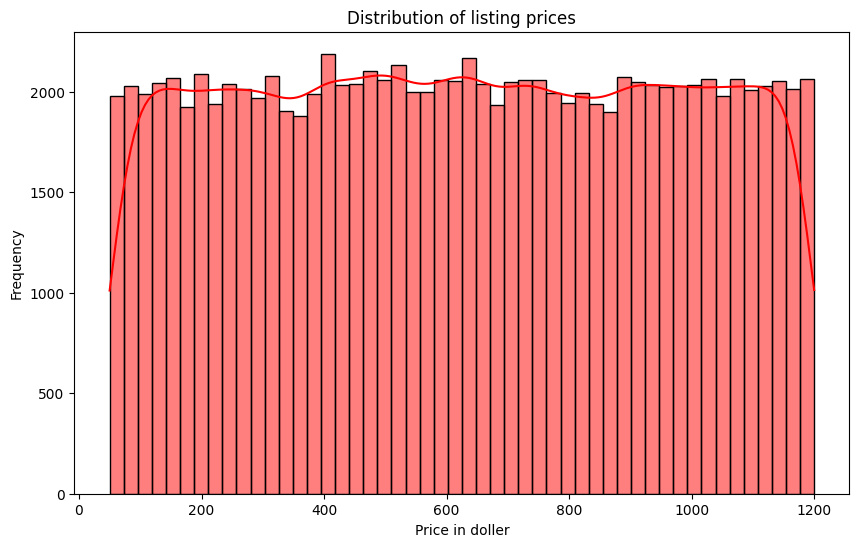

In [15]:
# visualization 
plt.figure(figsize = (10,6))
sns.histplot(df['price'], bins = 50, kde = True, color= 'red')
plt.title('Distribution of listing prices')
plt.xlabel('Price in doller')
plt.ylabel('Frequency')
plt.show()

The histogram shows a fairly even distribution of listing prices across different price ranges indicating no particular 
concentration of listings in any specific price range. The KDE line helps visualize this even spread more clearly, conforming 
that the dataset contains listing with a wise varity of prices

# Q: How are different room types distributed?

In [16]:
df['room type']

0            Private room
1         Entire home/apt
2            Private room
3         Entire home/apt
4         Entire home/apt
               ...       
101405       Private room
101406       Private room
101407    Entire home/apt
101408       Private room
101409    Entire home/apt
Name: room type, Length: 101410, dtype: object

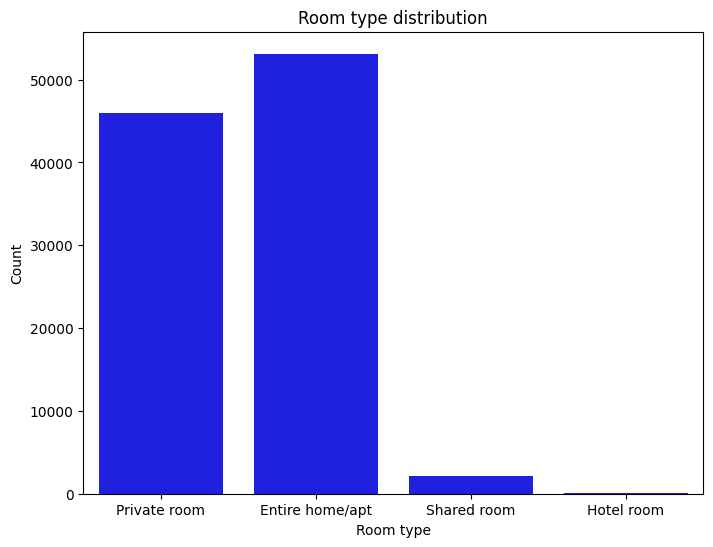

In [17]:
# visualization
plt.figure(figsize = (8,6))
sns.countplot(x = 'room type', data = df, color = 'blue')
plt.title('Room type distribution')
plt.xlabel('Room type')
plt.ylabel('Count')
plt.show()

The count plot shows that majority of the listings are for Entire home/apt and private room with shared room and hotel 
room being much less common.

# Q: How are listing distributed across different neighbourhood?

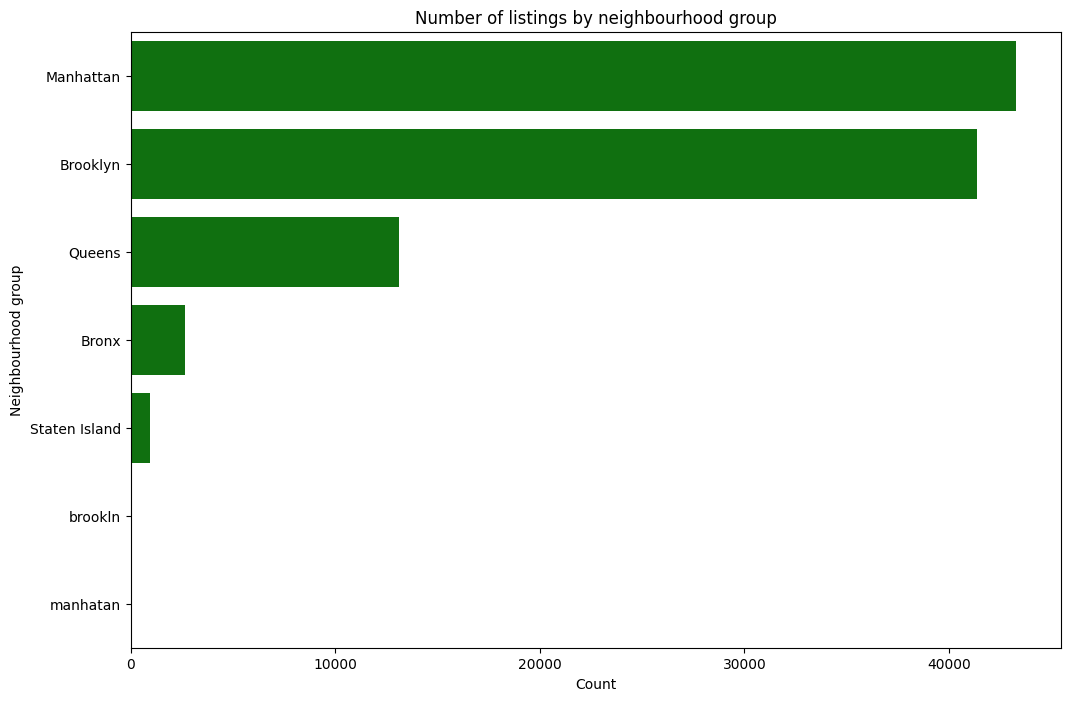

In [18]:
# visualization
plt.figure(figsize=(12,8))
sns.countplot(y='neighbourhood group', data = df, color = 'green', order=df['neighbourhood group'].value_counts().index)
plt.title('Number of listings by neighbourhood group')
plt.xlabel('Count')
plt.ylabel('Neighbourhood group')
plt.show()

Manhattan and Brooklyn dominate the listings, suggesting that they are the prime locations for the Airbnb. Queens, Bronx and
Staten Island has fewer listings.

# Q: What is the relationship between prices and room type?

C:\Users\deshwar\AppData\Local\Temp\ipykernel_17912\223173556.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = 'Room type')


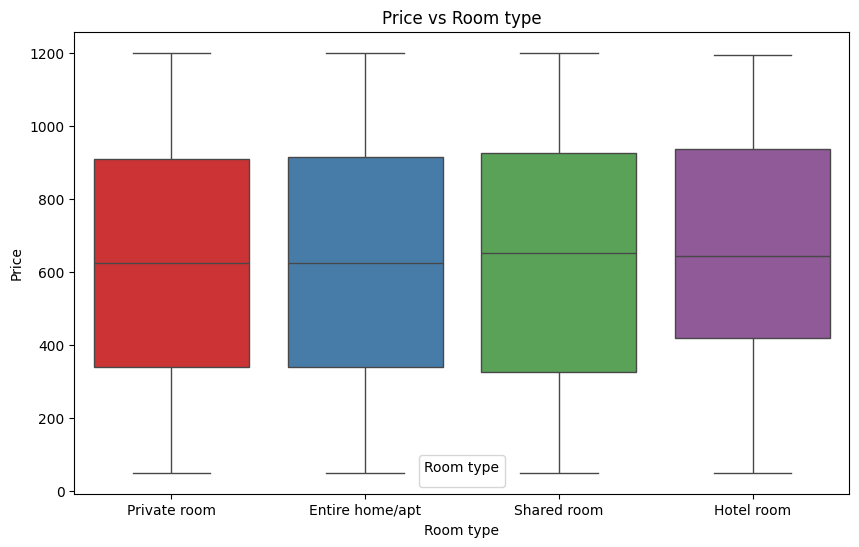

In [19]:
# visualization
plt.figure(figsize = (10,6))
sns.boxplot(x = 'room type', y = 'price', hue = 'room type', data = df, palette = 'Set1')
plt.title('Price vs Room type')
plt.xlabel('Room type')
plt.ylabel('Price')
plt.legend(title = 'Room type')
plt.show()

It shows that while Shared room tends to have lower prices, Private room, Entire home/apt and Hotel room have higher and more 
varied price ranges.

# Q: How has the number of reviews change over with time?

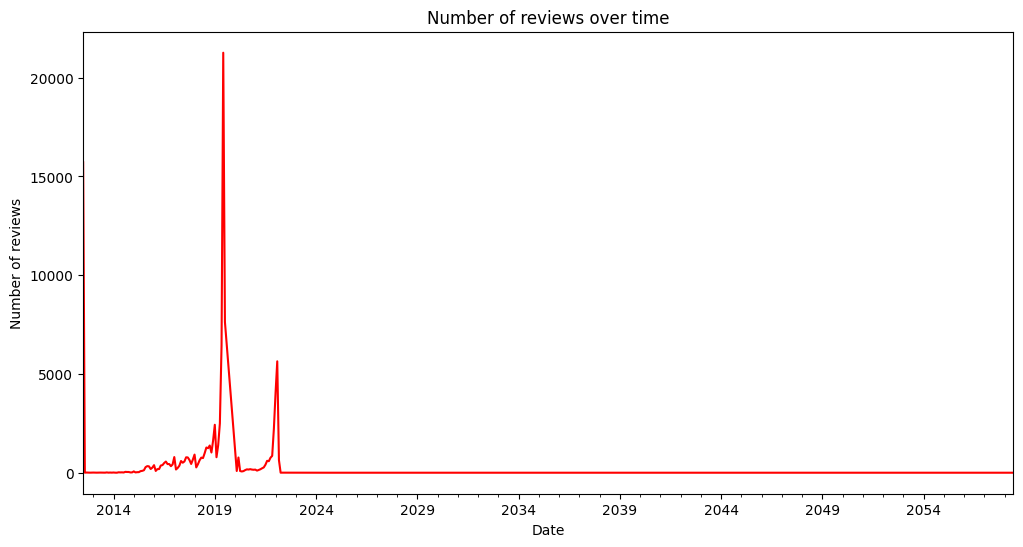

In [20]:
df['last review'] = pd.to_datetime(df['last review'])
reviews_over_time = df.groupby(df['last review'].dt.to_period('M')).size()

plt.figure(figsize = (12,6))
reviews_over_time.plot(kind = 'line', color = 'red')
plt.title('Number of reviews over time')
plt.xlabel('Date')
plt.ylabel('Number of reviews')
plt.show()

The line plot provides a clear visualization of the number of reviews over time. It helps to identify trends and pattern in
review activity such as periods of high or low activity.

In [21]:
df.to_csv('compressed_data.csv', index = False)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101410 entries, 0 to 101409
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              101410 non-null  int64         
 1   NAME                            101410 non-null  object        
 2   host id                         101410 non-null  int64         
 3   host_identity_verified          101134 non-null  object        
 4   host name                       101410 non-null  object        
 5   neighbourhood group             101384 non-null  object        
 6   neighbourhood                   101394 non-null  object        
 7   lat                             101402 non-null  float64       
 8   long                            101402 non-null  float64       
 9   country                         100884 non-null  object        
 10  country code                    101288 non-null  object 

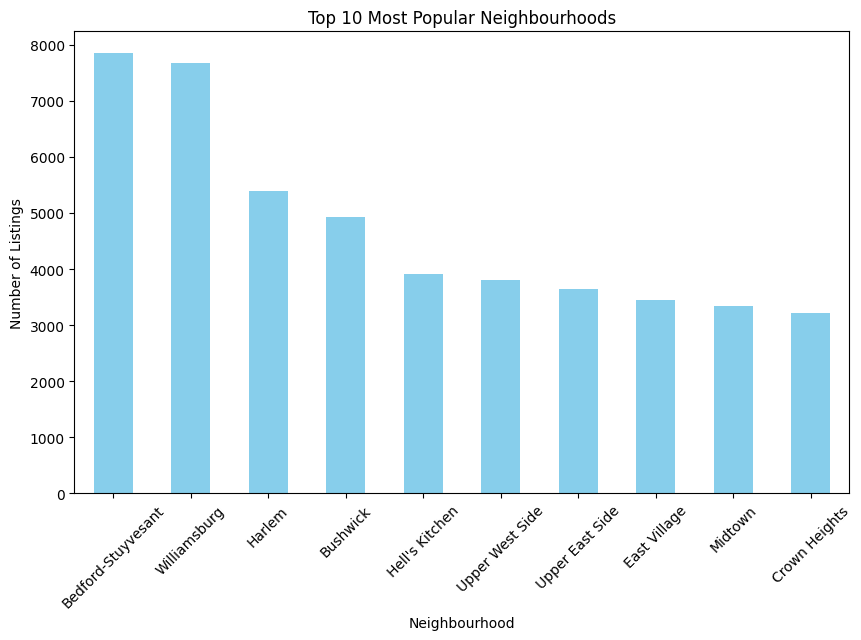

In [26]:
# most popular neighbourhood
neighbourhood_counts = df['neighbourhood'].value_counts().head(10)  # Top 10 popular neighbourhoods

plt.figure(figsize=(10, 6))
neighbourhood_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Popular Neighbourhoods')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()